# Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

print("imorted")


imorted


# Loading Data

In [84]:
df = pd.read_csv("kaggle_diabetes.csv")

In [85]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Exploring Dataset
## 1. Descriptive Statistics

Data stats

In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Data Types

In [87]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [89]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness               110.00
Insulin                     744.00
BMI                          80.60
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

##  2. Aggregations & GroupBy

Group by outcome (diabetic vs non-diabetic):


In [91]:
df.groupby('Outcome').mean(numeric_only=True)  # Average per group
df.groupby('Outcome').agg(['mean', 'median', 'std'])  # Multiple stats


Pregnancies                      Glucose                    \
               mean median       std        mean median        std   
Outcome                                                              
0          3.168693    2.0  2.913526  110.586626  107.0  26.495327   
1          4.732456    4.0  3.746358  141.568713  140.0  32.027938   

        BloodPressure                   SkinThickness  ...     Insulin  \
                 mean median        std          mean  ...         std   
Outcome                                                ...               
0           68.094985   70.0  18.060800     20.052432  ...   98.018597   
1           71.166667   74.0  21.056467     22.633041  ...  130.963804   

               BMI                  DiabetesPedigreeFunction                   \
              mean median       std                     mean median       std   
Outcome                                                                         
0        30.567477   30.1  8.160265                 0.434676  0.342  0.294268   
1        35.320468   34.3  7.162826                 0.540681  0.434  0.363689   

               Age                    
              mean median        std  
Outcome                               
0        31.081307   26.0  11.721103  
1        36.956140   36.0  10.924115  

[2 rows x 24 columns]

# 3. Visualizations (binning and Visualizing)



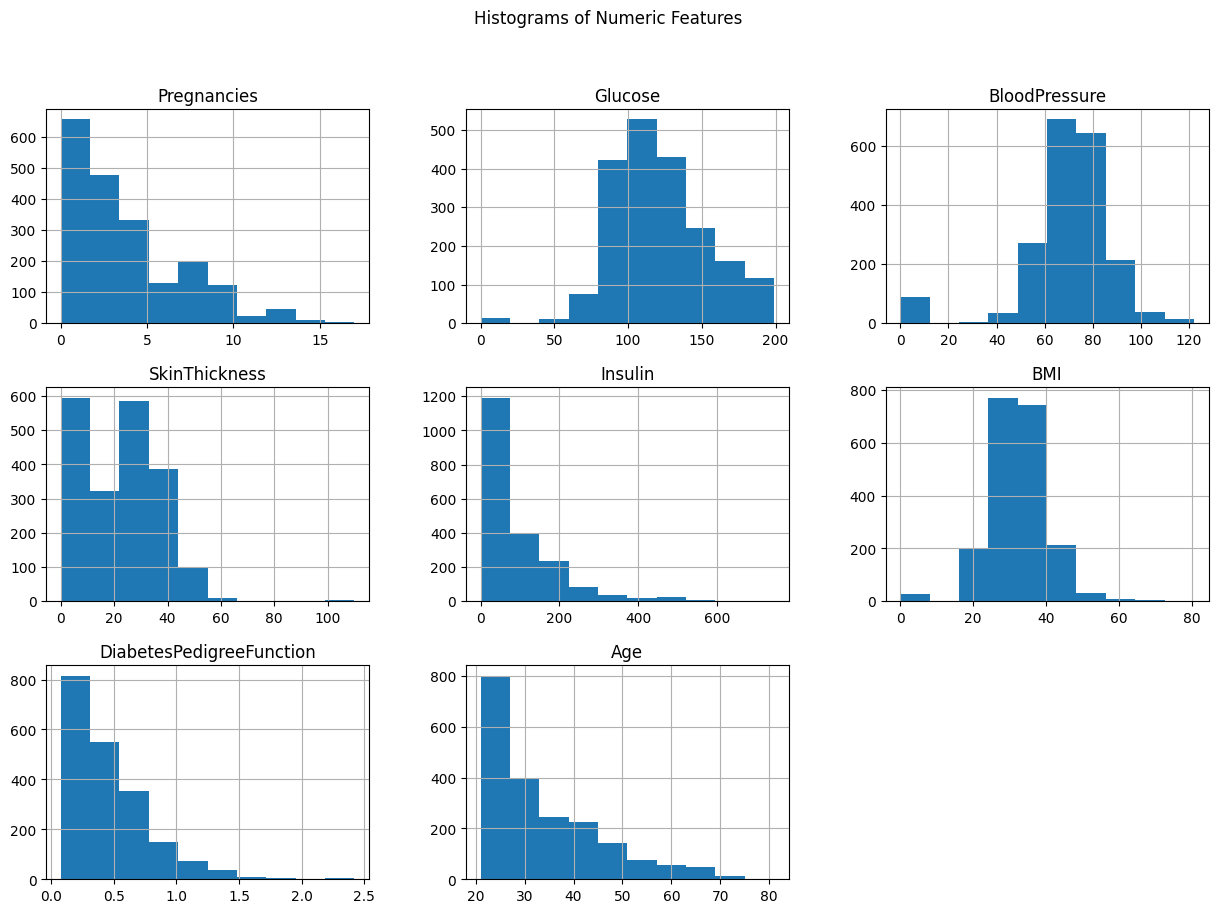

In [92]:
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numeric_features].hist(bins=10, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()


## a. Pregnencies

In [93]:

# Assuming 'Pregnancies' is in df
bins = [-1, 0, 1, 3, 5, 8, 12, 20]
labels = ['None', '1', '2–3', '4–5', '6–8', '9–12', '13+']
df['Pregnancies_bin'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels)

# Display percentage distribution
preg_bin_percent = df['Pregnancies_bin'].value_counts(normalize=True) * 100
preg_bin_percent = preg_bin_percent.round(2).astype(str) + '%'
print(preg_bin_percent)


Pregnancies_bin
2–3     23.95%
1        17.8%
4–5      16.6%
6–8     16.35%
None    15.05%
9–12     8.55%
13+       1.7%
Name: proportion, dtype: object


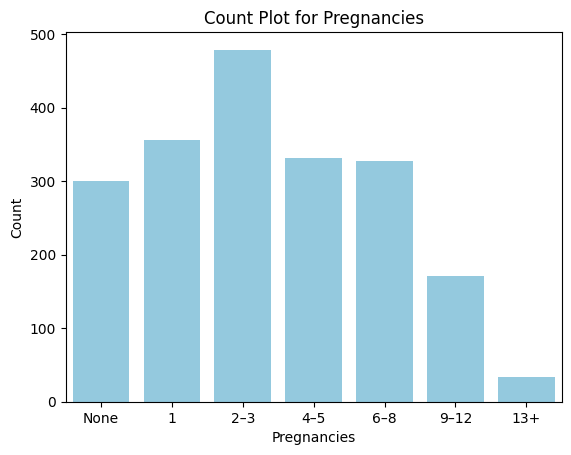

In [94]:
sns.countplot(x='Pregnancies_bin', data=df, color='skyblue')
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.title("Count Plot for Pregnancies")
plt.show()


## b. Gulucose

In [95]:

# Define bin edges and neutral labels
glucose_bins = [0, 99, 125, df['Glucose'].max()]  # max ensures all values are included
glucose_labels = ['Low', 'Medium', 'High']

# Apply binning
df['Glucose_bin'] = pd.cut( df['Glucose'], bins=glucose_bins, labels=glucose_labels)
bin_percent = (df['Glucose_bin'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print(bin_percent)


Glucose_bin
High      39.71%
Medium    34.78%
Low       25.52%
Name: proportion, dtype: object


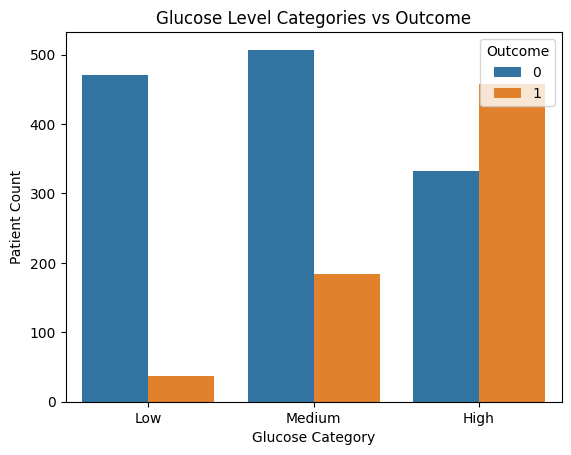

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Glucose_bin', hue='Outcome', data=df)
plt.title('Glucose Level Categories vs Outcome')
plt.xlabel('Glucose Category')
plt.ylabel('Patient Count')
plt.show()


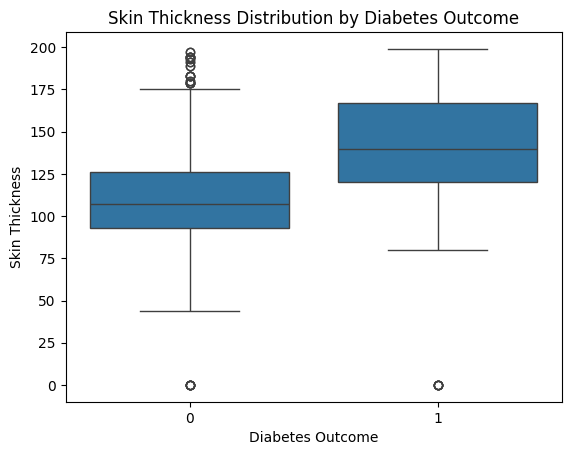

In [97]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Skin Thickness Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Skin Thickness')
plt.show()


## c. Blood Pressure

In [98]:
# Define bin edges
bp_bins = [0, 79, 89, 119, df['BloodPressure'].max()]

# Define labels using ranges
bp_labels = ['0–79', '80–89', '90–119', '120+']

# Apply binning
df['BloodPressure_bin'] = pd.cut(
    df['BloodPressure'],
    bins=bp_bins,
    labels=bp_labels,
    right=True,
    include_lowest=True
)
print((df['BloodPressure_bin'].value_counts(normalize=True) * 100).round(2).astype(str)+'%')

BloodPressure_bin
0–79      73.85%
80–89      18.8%
90–119      7.2%
120+       0.15%
Name: proportion, dtype: object


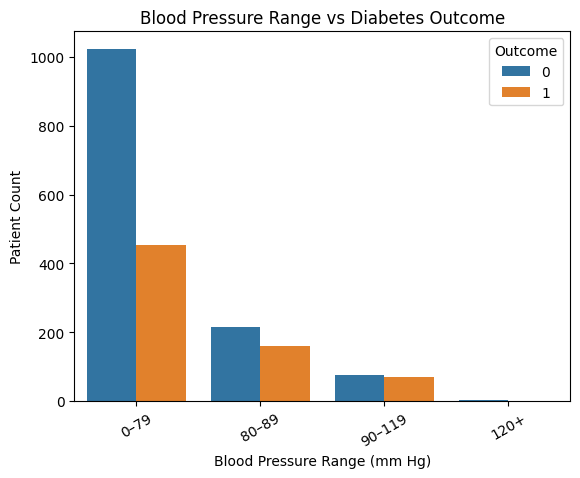

In [99]:
sns.countplot(x='BloodPressure_bin', hue='Outcome', data=df)
plt.title('Blood Pressure Range vs Diabetes Outcome')
plt.xlabel('Blood Pressure Range (mm Hg)')
plt.ylabel('Patient Count')
plt.xticks(rotation=30)
plt.show()


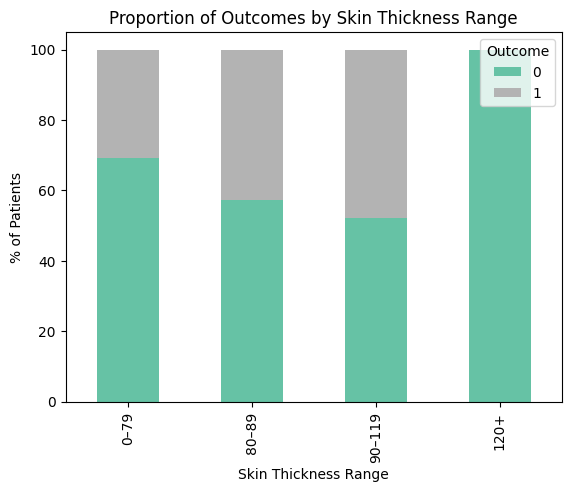

In [100]:

stacked = pd.crosstab(df['BloodPressure_bin'], df['Outcome'], normalize='index') * 100
stacked.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Outcomes by Skin Thickness Range')
plt.ylabel('% of Patients')
plt.xlabel('Skin Thickness Range')
plt.legend(title='Outcome', loc='upper right')
plt.show()


## d. Skin Thickness

In [101]:
# Define bin edges
skin_bins = [-1, 0, 10, 20, 30, 50, 110]  # -1 to catch 0 in the first bin
skin_labels = ['0 (Missing)', '1–10', '11–20', '21–30', '31–50', '51–110']

# Apply binning
df['SkinThickness_bin'] = pd.cut(
    df['SkinThickness'],
    bins=skin_bins,
    labels=skin_labels,
    include_lowest=True
)


In [102]:
print((df['SkinThickness_bin'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


SkinThickness_bin
31–50          30.25%
0 (Missing)    28.65%
21–30          23.95%
11–20           14.8%
51–110          1.25%
1–10             1.1%
Name: proportion, dtype: object


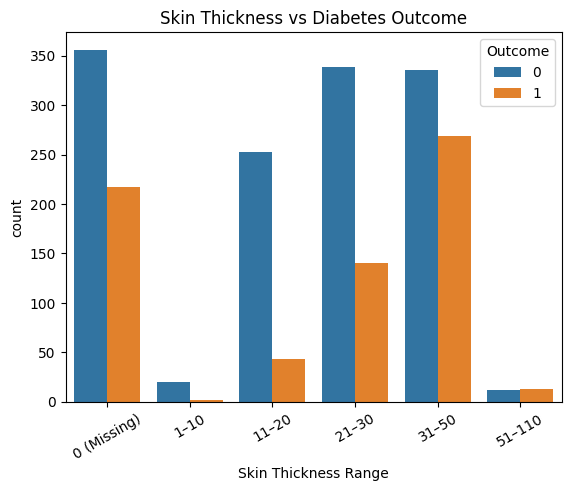

In [103]:
sns.countplot(x='SkinThickness_bin', hue='Outcome', data=df)
plt.title('Skin Thickness vs Diabetes Outcome')
plt.xlabel('Skin Thickness Range')
plt.xticks(rotation=30)
plt.show()


## e. Insulin

In [104]:
insulin_bins = [-1, 0, 30, 80, 200, 400, 800]
insulin_labels = ['0 (Missing)', '1–30', '31–80', '81–200', '201–400', '401+']

df['Insulin_bin'] = pd.cut(
    df['Insulin'],
    bins=insulin_bins,
    labels=insulin_labels,
    include_lowest=True
)
print((df['Insulin_bin'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')



Insulin_bin
0 (Missing)     47.8%
81–200          27.1%
31–80          12.65%
201–400         8.65%
401+             2.5%
1–30             1.3%
Name: proportion, dtype: object


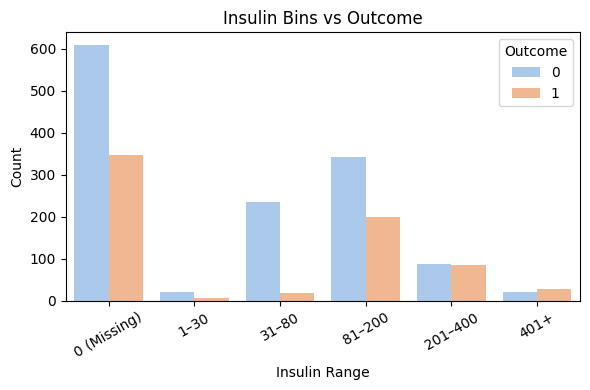

In [105]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Insulin_bin', data=df, hue='Outcome', palette='pastel')
plt.title('Insulin Bins vs Outcome')
plt.xlabel('Insulin Range')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## f. Bmi

In [106]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, df['BMI'].max()]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']

df['BMI_bin'] = pd.cut(
    df['BMI'],
    bins=bmi_bins,
    labels=bmi_labels,
    include_lowest=True
)
print((df['BMI_bin'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')



BMI_bin
Obese I        28.65%
Overweight     23.75%
Obese II        19.4%
Obese III      13.55%
Normal         12.75%
Underweight      1.9%
Name: proportion, dtype: object


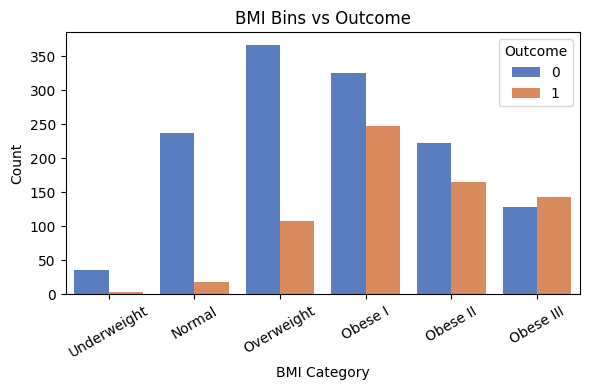

In [107]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BMI_bin', data=df, hue='Outcome', palette='muted')
plt.title('BMI Bins vs Outcome')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## g. AGE

In [108]:
age_bins = [20, 29, 39, 49, 59, 69, 81]
age_labels = ['21–29', '30–39', '40–49', '50–59', '60–69', '70–81']

df['Age_bin'] = pd.cut(
    df['Age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True
)
print((df['Age_bin'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


Age_bin
21–29    52.5%
30–39    21.2%
40–49    15.5%
50–59     6.5%
60–69    3.85%
70–81    0.45%
Name: proportion, dtype: object


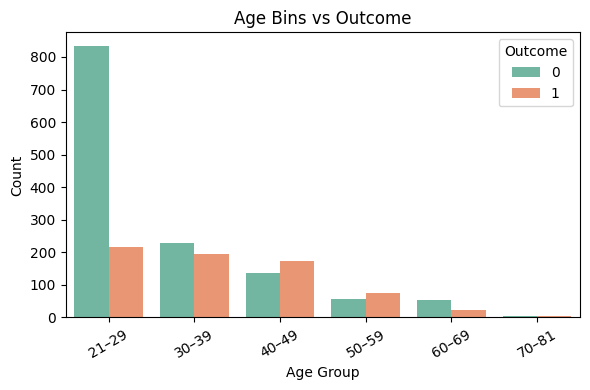

In [109]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Age_bin', data=df, hue='Outcome', palette='Set2')
plt.title('Age Bins vs Outcome')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs

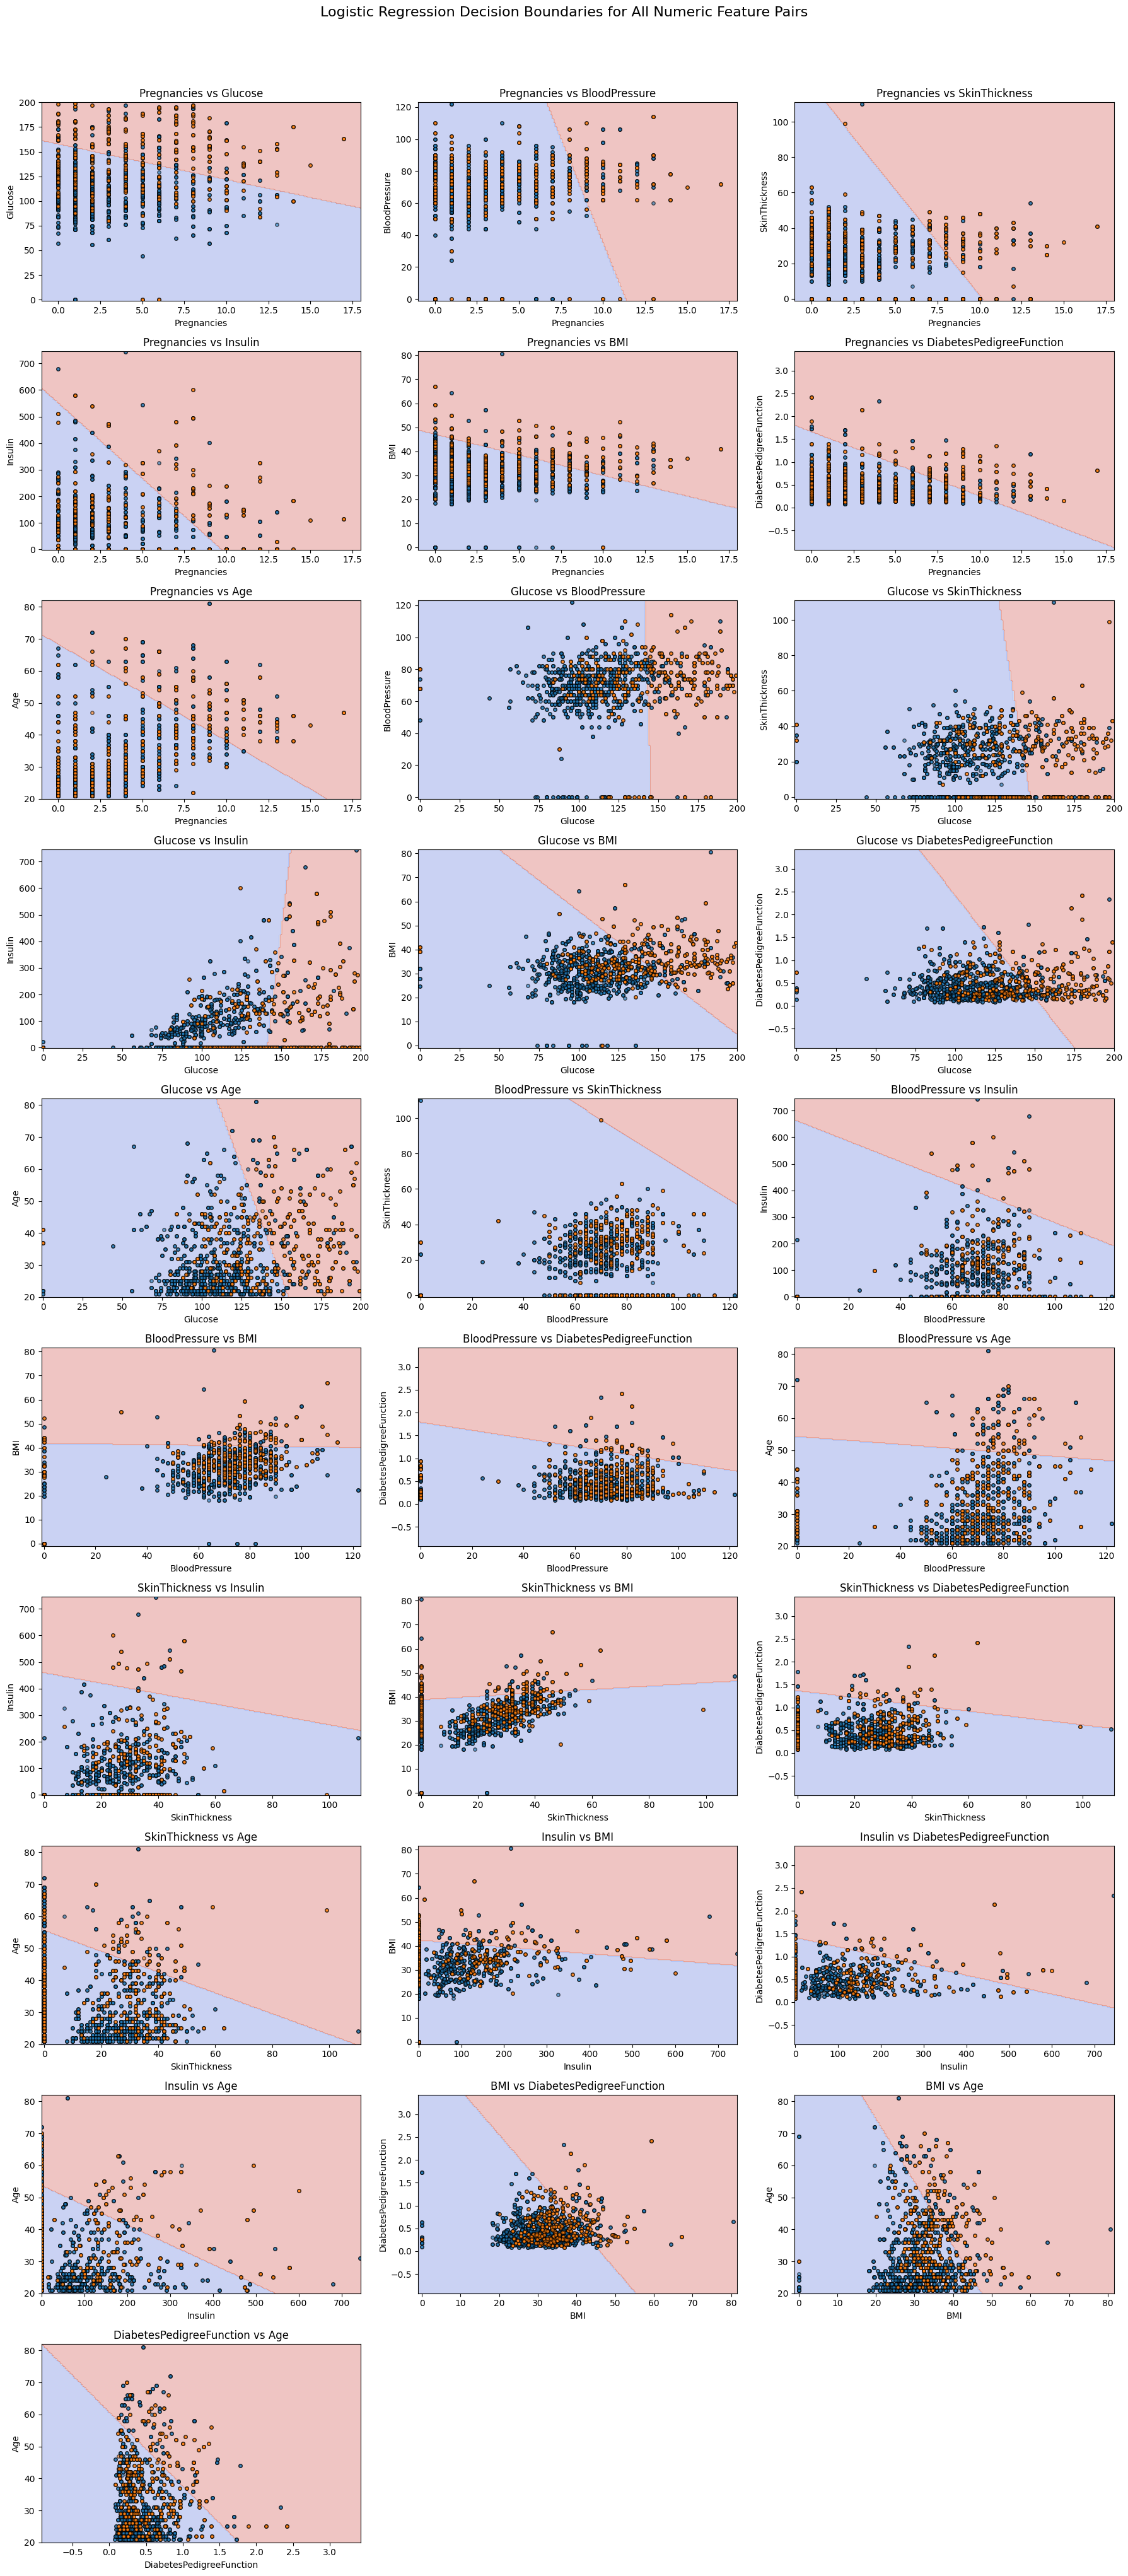

# 4. Correlation 

In [111]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


## Correlation Heatmap:


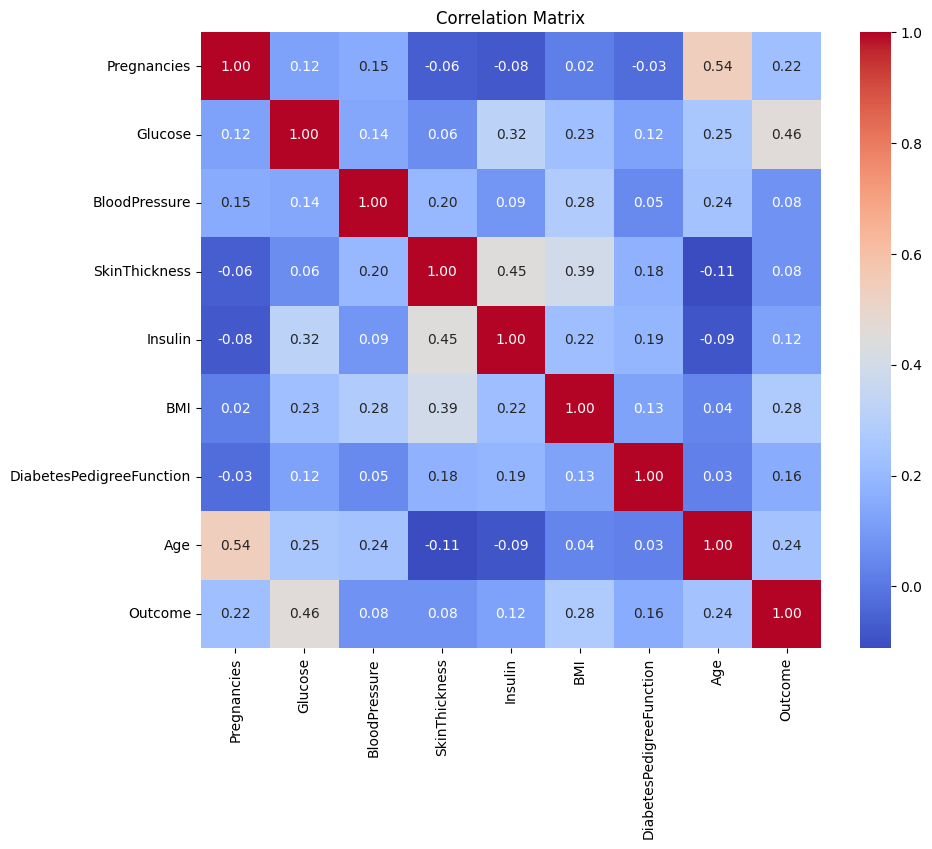

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [113]:
cor_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
print(cor_with_target)


Outcome                     1.000000
Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
Name: Outcome, dtype: float64


# 5. Distribution & Outlier Detection

<Axes: >

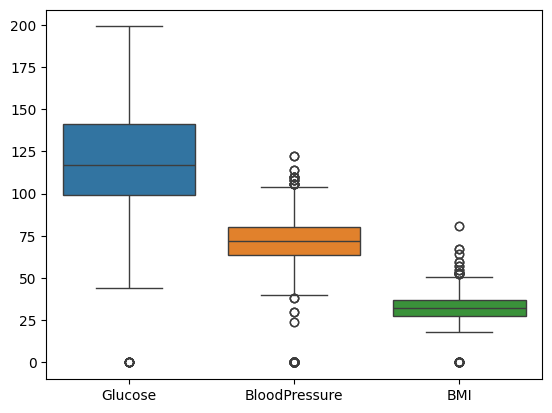

In [114]:
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'BMI']])


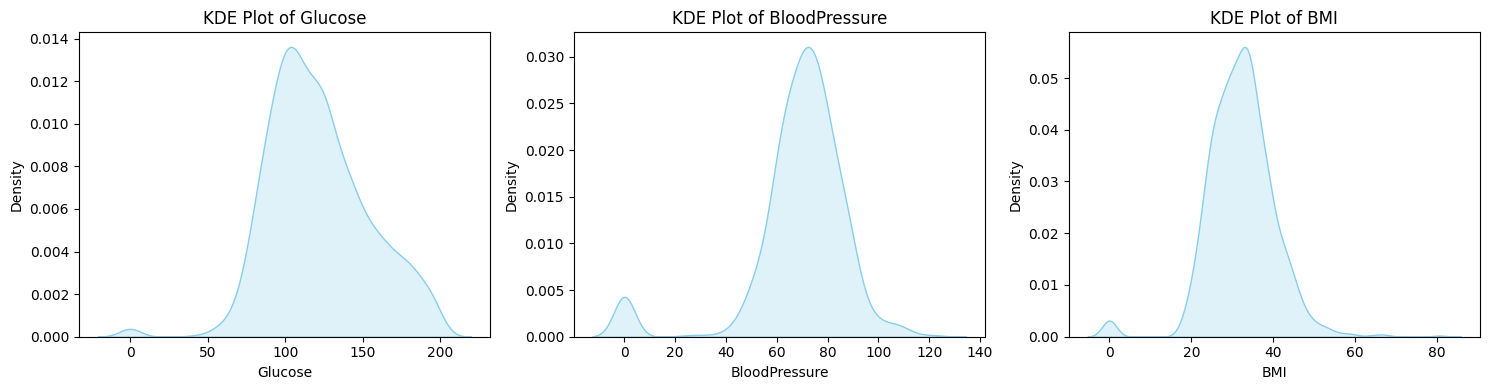

In [115]:
cols = ['Glucose', 'BloodPressure', 'BMI']
plt.figure(figsize=(15, 4))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(df[col], fill=True, color='skyblue') 
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [116]:
for col in df.select_dtypes(include='number').columns:
    top_values = df[col].sort_values(ascending=False).head().values
    bottom_values = df[df[col] > 0][col].sort_values().head().values

    print(f"\n📌 Column: {col}")
    print("🔼 Top 5 highest values:")
    for i, val in enumerate(top_values, start=1):
        print(f"   {i}. {val}")

    if len(bottom_values) >= 5:
        print("🔽 Bottom 5 lowest non-zero values:")
        for i, val in enumerate(bottom_values, start=1):
            print(f"   {i}. {val}")
    else:
        print("🔽 Not enough non-zero values to display bottom 5.")



📌 Column: Pregnancies
🔼 Top 5 highest values:
   1. 17
   2. 17
   3. 17
   4. 15
   5. 15
🔽 Bottom 5 lowest non-zero values:
   1. 1
   2. 1
   3. 1
   4. 1
   5. 1

📌 Column: Glucose
🔼 Top 5 highest values:
   1. 199
   2. 199
   3. 199
   4. 198
   5. 198
🔽 Bottom 5 lowest non-zero values:
   1. 44
   2. 44
   3. 56
   4. 56
   5. 56

📌 Column: BloodPressure
🔼 Top 5 highest values:
   1. 122
   2. 122
   3. 122
   4. 114
   5. 114
🔽 Bottom 5 lowest non-zero values:
   1. 24
   2. 24
   3. 30
   4. 30
   5. 30

📌 Column: SkinThickness
🔼 Top 5 highest values:
   1. 110
   2. 110
   3. 99
   4. 99
   5. 63
🔽 Bottom 5 lowest non-zero values:
   1. 7
   2. 7
   3. 7
   4. 8
   5. 8

📌 Column: Insulin
🔼 Top 5 highest values:
   1. 744
   2. 744
   3. 680
   4. 680
   5. 600
🔽 Bottom 5 lowest non-zero values:
   1. 14
   2. 14
   3. 14
   4. 15
   5. 15

📌 Column: BMI
🔼 Top 5 highest values:
   1. 80.6
   2. 80.6
   3. 67.1
   4. 67.1
   5. 67.1
🔽 Bottom 5 lowest non-zero values:
   1. 18

In [117]:
# sns.pairplot(df, hue='Outcome')
# plt.title("Pairplot of Features with Outcome")
# plt.show()
# print("---")


# Model Building

## Data Normalization using Min-Max Scaling


In [118]:
# Min-Max Scaling (Normalization to the range [0, 1])
min_max_scaler = MinMaxScaler()
df1 = min_max_scaler.fit_transform(df[['Pregnancies', 'Glucose',
                                       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                                       'DiabetesPedigreeFunction', 'Age']])
df1= pd.DataFrame(df1, columns=['Pregnancies', 'Glucose', 'BloodPressure',
                                'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Print the first few rows of the normalized DataFrames
print("Min-Max Scaled Data:")
df1.head()
#print("\nStandardized Data:")
#df_normalized_standard.head()

Min-Max Scaled Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000


## Split Features (X) and Target Variable (y)


In [119]:
X = df1 # Exclude 'Id' and 'Outcome' columns
y = df['Outcome'] # Target variable is 'Outcome'

## Train-Test Split


In [133]:
# 👉 Define and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Dump the model
joblib.dump(scaler, "scaler.pkl")
joblib.dump((X_test, y_test), "test_data.pkl")  # 👈 this line saves test data



['test_data.pkl']

## Logistic Regression Model

In [121]:
model = LogisticRegression()

In [122]:
model.fit(X_train, y_train)

LogisticRegression()

Dummp the Model

In [123]:
joblib.dump(model, "log_model.pkl")


['log_model.pkl']

## Evaluate Logistic Regression Model


In [124]:
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       253
           1       0.80      0.57      0.67       147

    accuracy                           0.79       400
   macro avg       0.79      0.74      0.76       400
weighted avg       0.79      0.79      0.78       400

[[232  21]
 [ 63  84]]
ROC-AUC Score: 0.7442123094297007


### `classification_report`

The `classification_report` is a function in the `sklearn.metrics` module that provides a detailed evaluation of a classification model's performance. It includes several important metrics for each class in a multi-class classification problem.

#### Metrics in `classification_report`

The `classification_report` includes the following metrics for each class:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all instances the model predicted as positive, how many were actually positive?"
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]

- **Recall (Sensitivity or True Positive Rate)**: The ratio of correctly predicted positive observations to the all observations in the actual class. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?"
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]

- **F1-Score**: The weighted average of Precision and Recall. It is useful when you need a balance between Precision and Recall.
  \[
  \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

- **Support**: The number of actual occurrences of the class in the dataset.

#### Example Usage

Here's how you might use the `classification_report` function:

```python
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


# Make predictions on the test data


In [125]:
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


# Random Forest model


In [126]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

dump random forest model

In [127]:
joblib.dump(rf_classifier, "rf_model.pkl")


['rf_model.pkl']

## # Evaluate Random forest Model


In [128]:
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

[[251   2]
 [  2 145]]
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

[[251   2]
 [  2 145]]


In [129]:
df['Predicted_Score'] = rf_classifier.predict(X)


c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [130]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_bin,Glucose_bin,BloodPressure_bin,SkinThickness_bin,Insulin_bin,BMI_bin,Age_bin,Predicted_Score
0,2,138,62,35,0,33.6,0.127,47,1,2–3,High,0–79,31–50,0 (Missing),Obese I,40–49,1
1,0,84,82,31,125,38.2,0.233,23,0,None,Low,80–89,31–50,81–200,Obese II,21–29,1
2,0,145,0,0,0,44.2,0.630,31,1,None,High,0–79,0 (Missing),0 (Missing),Obese III,30–39,1
3,0,135,68,42,250,42.3,0.365,24,1,None,High,0–79,31–50,201–400,Obese III,21–29,1
4,1,139,62,41,480,40.7,0.536,21,0,1,High,0–79,31–50,401+,Obese III,21–29,1


In [131]:
correlation= df["Outcome"].corr(df['Predicted_Score'])
correlation

np.float64(-0.01062838720026436)

In [136]:
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import itertools

# Create output directory if not exists
os.makedirs("saved_graphs", exist_ok=True)

# ✅ Step 1: Select numeric features only (exclude Outcome)
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('Outcome')
feature_pairs = list(itertools.combinations(numeric_features, 2))

# ✅ Step 2: Set grid layout
cols = 3
rows = (len(feature_pairs) + cols - 1) // cols
plt.figure(figsize=(6 * cols, 4 * rows))

# ✅ Step 3: Loop through feature pairs
for idx, (f1, f2) in enumerate(feature_pairs, 1):
    X = df[[f1, f2]]
    y = df['Outcome']

    model = LogisticRegression()
    model.fit(X, y)

    x_min, x_max = X[f1].min() - 1, X[f1].max() + 1
    y_min, y_max = X[f2].min() - 1, X[f2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(rows, cols, idx)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[f1][y == 0], X[f2][y == 0], label='0', alpha=0.6, edgecolor='k', s=15)
    plt.scatter(X[f1][y == 1], X[f2][y == 1], label='1', alpha=0.6, edgecolor='k', s=15)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs {f2}')
    plt.tight_layout()

# Save the plot as PNG
plt.suptitle('Logistic Regression Decision Boundaries for All Numeric Feature Pairs', fontsize=16, y=1.02)
plt.tight_layout()
plt.show
plt.savefig("saved_graphs/decision_boundaries.png", dpi=300)
plt.close()


c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Muqnit Ur Rehman\AppData\Local\Programs